**Robert Kaszubski**
**CSC 578 - Section 710**
**Homework 7 – Convolution Neural Networks**

# CSC 578 NN&DL Fall 2021
## HW7: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!

2.7.0


In [ ]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [ ]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [ ]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [ ]:
train_labels

array([[6],
       [2],
       [8],
       ...,
       [2],
       [4],
       [5]], dtype=uint8)

In [ ]:
valid_labels

array([[1],
       [8],
       [9],
       ...,
       [4],
       [2],
       [1]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

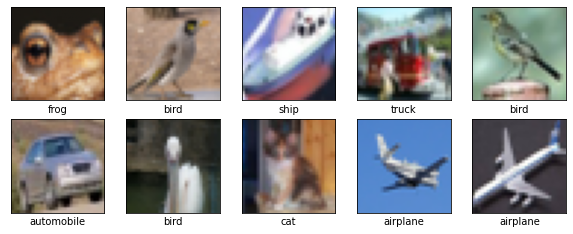

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

**Attempted to add Data Augmentation**

In [ ]:
'''
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
'''

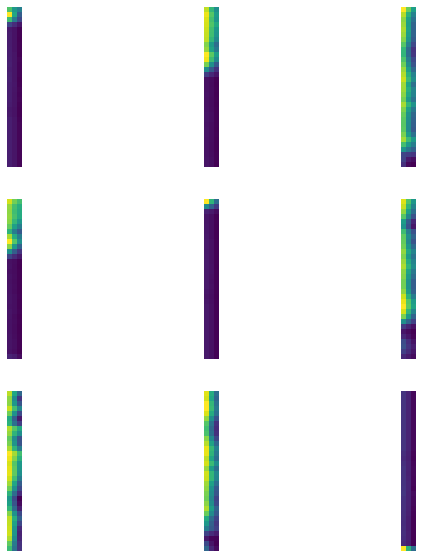

In [ ]:
'''
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(train_images[0])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")
'''

**Best Overall Model - Highest Kaggle Score**

Added callback to save best weights from training 

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

Verify the model

In [ ]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_191 (Conv2D)         (None, 31, 31, 64)        832       
                                                                 
 batch_normalization_17 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_192 (Conv2D)         (None, 30, 30, 64)        16448     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_98 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_193 (Conv2D)         (None, 14, 14, 128)     

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])



### Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, callbacks=[callback], 
                    validation_data=(valid_images, valid_labels))

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6185 - accuracy: 0.4052 - val_loss: 1.7805 - val_accuracy: 0.3874
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3090 - accuracy: 0.5243 - val_loss: 1.3832 - val_accuracy: 0.5212
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1531 - accuracy: 0.5861 - val_loss: 1.1472 - val_accuracy: 0.5865
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0860 - accuracy: 0.6114 - val_loss: 1.0210 - val_accuracy: 0.6498
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0308 - accuracy: 0.6330 - val_loss: 1.1330 - val_accuracy: 0.6463
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9948 - accuracy: 0.6471 - val_loss: 1.0043 - val_accuracy: 0.6383
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9525 - accuracy: 0.6645 - val_loss: 0.9638 - val_ac

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 1s - loss: 0.5685 - accuracy: 0.8033 - 787ms/epoch - 3ms/step
valid_accuracy=0.8033000230789185, valid_loss=0.5685405731201172


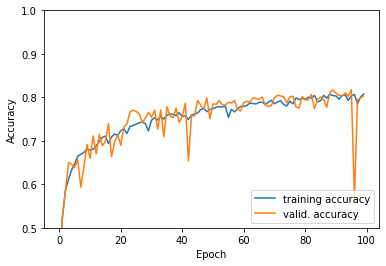

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

In [ ]:
predictions = model.predict(test_images)


In [ ]:
predictions[0]

array([3.4954617e-04, 5.3431617e-05, 3.3582603e-03, 8.3703762e-01,
       1.4302431e-03, 1.2573761e-01, 2.9787323e-02, 6.4202416e-04,
       1.5763802e-03, 2.7440994e-05], dtype=float32)

In [ ]:
#output list
output = []
output.append(['id','cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9'])

#add id to each row
count = 1
for row in predictions:
  prediction = [count] + row.tolist()
  output.append(prediction)
  count += 1

In [ ]:
output[1]

[1,
 0.00034954617149196565,
 5.3431616834132e-05,
 0.0033582602627575397,
 0.8370376229286194,
 0.001430243137292564,
 0.12573760747909546,
 0.029787322506308556,
 0.0006420241552405059,
 0.0015763802221044898,
 2.7440994017524645e-05]

In [ ]:
import csv

#export output to csv
with open('predictions.csv', 'w') as f:
  writer = csv.writer(f)
  for row in output:
    writer.writerow(row)

**Interesting Model found while experimenting**

In [ ]:
#interesting model
'''
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.15))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
'''

"\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))\nmodel.add(layers.Conv2D(64, (2, 2), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Dropout(0.15))\nmodel.add(layers.BatchNormalization())\nmodel.add(layers.Conv2D(128, (2, 2), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.BatchNormalization())\nmodel.add(layers.Conv2D(128, (4, 4), activation='relu'))\nmodel.add(layers.Flatten())\nmodel.add(layers.BatchNormalization())\nmodel.add(layers.Dropout(0.15))\nmodel.add(layers.Dense(128, activation='relu'))\nmodel.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(10, activation='softmax'))  # As noted above\n"

**Other Model when training with only 10 epochs**

In [ ]:
#other interesting model
'''
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.15))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above
'''

"\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))\nmodel.add(layers.Conv2D(64, (2, 2), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Dropout(0.15))\nmodel.add(layers.Conv2D(128, (2, 2), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(128, (4, 4), activation='relu'))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dropout(0.15))\nmodel.add(layers.Dense(128, activation='relu'))\nmodel.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(10, activation='softmax'))  # As noted above\n"